# Classificazione
- **Classificare** significa identificare a quale classe appartiene un oggetto (in gergo *etichettare*), sulla base di un insieme di **caratteristiche** (features) osservate.

- Ad esempio date delle cellule tumorali aventi determinate caratteristiche
    
    - area
    - perimetro
    - consistenza
    - varianza scala di grigi
    - ...
    
  si vuole classificare se sono **benigne** o **maligne**

- Sulla base di queste features, si possono plottare i dati relativi su un grafico

<img src="imgs/classificazione.PNG" alt="" width=500>

- Il grafico in questione, per essere compreso facilmente, ha solo due feature rappresentate, ma in realtà ce ne possono essere molte di più.

- In questo caso, sulla base delle feature, le cellule possono essere etichettate in due classi
  
  - **benigne** (punti blu)
  - **maligne** (punti rossi)

- In questo senso la **classificazione** corrisponde all'*identificazione di una funzione* che massimizzi la separazione fra le due classi.
  
  - in figura la retta nera

## Iperpiani di Separazione e Classificazione
- Si parla dunque di ricerca di **iperpiani di separazione** (o di **classificazione**) fra le classi.

<img src="imgs/iperpiano.PNG" alt="" width=350>

- La ricerca di iperpiani di separazione è, fra l'altro, un problema ricorrente all'interno delle reti neurali. 

- Dati i punti $\mathbf{x}_i$ (è un vettore poiché generalmente ogni punto può essere identificato da più features) che giaciono sull'iperpiano, soddisfano la seguente uguaglianza (equazione dell'iperpiano) $\mathbf{w}^T \cdot \mathbf{x}_i + b = 0$

- I punti $x_i$ tali che $\mathbf{w}^T \cdot \mathbf{x}_i > b$ sono le istanze con $\mathbf{y}_i > 0$ 
  
  - come nella regressione la variabile target (da predire) è la $\mathbf{y}$
    
    - poiché in questo caso stiamo classificando le istanze in due valori, la variabile può assumere solo due valori (-1 o 1).
  
  - queste istanze vengono etichettate con label 1

- I punti $\mathbf{x}_i$ tali che $\mathbf{w}^T \cdot \mathbf{x}_i < -b$ sono le istanze con $\mathbf{y}_i < 0$ 
  
  - queste istanze vengono etichettate con label -1

- Il termine $b$ (intercetta), è proporzionale alla distanza dell'iperpiano dall'origine.
  
  - Infatti la distanza dell'iperpiano dall'origine misura 
  $$
    d = \frac{b}{\vert\vert \mathbf{w} \vert \vert}
  $$

## Caratteristche dei classificatori
- Gli iperpiani di classificazione possono essere molteplici
  
  - potenzialmente possono essere anche infiniti (magari non tutti con stesso **errore**)
    
    - l'**errore** nel caso di classificazione è rappresentato da un'etichettatura errata.

<img src="imgs/iperpiani.PNG" alt="" width=300>

- Occorre pertanto stabilire un criterio di **ottimalità** per la scelta dell'iperpiano di separazione migliore.

- Sulla base di questo criterio si possono costruire dei modelli di ricerca di questi iperpiani.
  
  - Alcuni modelli individuano un iperpiano di separazione **non ottimale** (non massimizza la separazione fra le classi), ma che comunque separa le classi.
    
    - Alcuni di questi modelli sono **Perceptron**, **Regressione Logisitca**, ecc.
  
  - Altri modelli individuano un iperpiano di separazione **ottimale** (massimizza la separazione fra le classi).
    
    - Il più famoso è il **Support Vector Machine** (SVM).  

- Quali dati influenzano la ricerca dell'iperpiano?
  
  - Gli algoritmi più banali (Perceptron, Regressione Logistica, ecc.) utilizzano tutti i punti del training set.
  
  - Altri algoritmi (come SVM) usano i **punti difficili** 
    
    - sono i punti più vicini all'iperpiano di separazione 
    
    - d'altronde se riesco a trovare un iperpiano che suddivide correttamente quei punti, quelli più distanti saranno classificati correttamente di conseguenza


## Classificatori non lineari
- Non tutti i problemi possono essere separati linearmente (cioè da un iperpiano).

<img src="imgs/classificatorinonlineari.PNG" alt="" width=200>

- In questi casi esistono numerosi approcci che risolvono il problema 
  
  - **Algoritmi non lineari** (es. SVM, Reti Neurali, k-Nearest-Neighbors, ecc.)
  
  - Queste oluzioni **trasformano lo spazio di dati** in modo che le classi siano **separabili linearmente**

- Supponiamo di trovarci in un caso monodimensionale: una sola feature con cui prevedere la classe.
  
  - I dati pertanto sono disposti su una retta come mostato in figura (rossi di una classe, blu dell'altra).
  
  - In questo caso un classificatore non riuscirebbe a separare linearmente i dati
    
    - dovrebbe tracciare una retta che divide lo spazio in due semipiani ma nessuno dei due conterrà solo dati di una classe

- Si può pensare in tal caso di trasformare lo spazio vettoriale da una dimensione a due
  
  - cioè aggiungendo una nuova feature
  
  - i dati sono gli stessi rispetto a prima ma sono disposti su due dimensioni
    
- In questo nuovo spazio bidimensionale, esiste un iperpiano che riesce a separare le due classi linearmente.

<img src="imgs/classificatorinonlineari2.PNG" alt="" width=300>

- Le **reti neurali** sono composte da layer che non fanno altro che trasformare lo spazio.
  
  - La differenza da un algoritmo di classificazione (es. SVM) è che la trasformazione non è nota a priori, ma viene appresa durante il training.
  
  - Nelle SVM definiamo noi la trasformazione da fare, nel caso sopra una trasformazione polinomiale
  
  - Le reti neurali sanno determinare autonomamente le feature

- Più feature si hanno nei dati, e più chance abbiamo di separare linearmente i dati.
  
  - Intuitivamente maggiore è la dimensionalità dello spazio e più facile è trovare un iperpiano che separa le classi (si è visto nell'esempio sopra trasformando lo spazio $\mathbb{R}$ in $\mathbb{R}^2$).

# Classificatore Lineare: Perceptron
- Primo classificatore lineare inventato. 

  - Nasce nel 1957 da Frank Rosenblatt

- Supponiamo di avere uno spazio in $\mathbb{R}^2$ 

  - Abbiamo due features $x_1, x_2$ che consentono di riportare sullo spazio (un piano) tutti i dati, come mostrato in figura

<img src="imgs/perceptron.PNG" alt="" width=400>

- In tal caso la classificazione consiste nel trovare un iperpiano (in $\mathbb{R}^2$ corrisponde a una retta) che separi le due classi.

  - Occorre cioè trovarer i parametri $w_1, w_2, b$ tali che
    $$
      \begin{align}
        &w_1x_1 + w_2x_2 + b > 0 \quad \text{per i punti rossi} \\
        &w_1x_1 + w_2x_2 + b < 0 \quad \text{per i punti blu}
      \end{align}
    $$

    - In tal caso le etichette saranno definite in questo modo
    $$
      \text{class}(x) = \begin{cases}
        +1 \text{ se } x \text{ è rosso} \\
        -1 \text{ se } x \text{ è blu}
      \end{cases} 
    $$

- Il Perceptron è un classificatore lineare che trova l'iperpiano di separazione in modo iterativo.

  - Di seguito lo pseudocodice

  ```python
    def perceptron_naive(x):
      # valori per b, w1, w2 generati casualmente, 
      # prendiamo cioè un piano casuale (in figura sopra la prima linea verde)
      # w1x1 + w2x2 + b = 0 -> -x1 + 9x2 = 0 -> x2 = -w1/w2 * x1 -> x2 = 0.11x1
      w = [0,-1,9] 
      x0 = 1
      classification_error = False
      for each instance x:
        if class(x) < 0 and w * x >= 0: # è un errore perché la classe è -1 ma il prodotto è >= 0 (cioè è classificato come +1)
          classification_error = True
          w = w - x # si sposta l'iperpiano più in alto
        else if class(x) > 0 and w * x <= 0: # è un errore perché la classe è +1 ma il prodotto è <= 0 (cioè è classificato come -1)
          classification_error = True
          w = w + x
      until classification_error == True
  
  ```

  l'idea è quella di ripetere il ciclo finché non ho più errore di classificazione, in modo da trovare l'iperpiano di separazione.
     
     - Alla prima iterazione del ciclo (in figura il quadratro numero 1) si verifica un errore poiché la retta classifica il punto cerchiato in verde in figura come > 0 (cioè sopra l'iperpiano), tuttavia il pallino è blu e dunque dovrebbe stare sotto la retta, dunque si fa $\mathbf{w} = \mathbf{w} - \mathbf{x}$ (in figura la seconda linea verde)

     - Alla seconda iterazione (in figura il riquadro numero due 2), si verifica lo stesso errore poiché la retta classifica ancora il punto come > 0, dunque si sposta di nuovo la figura più in alto

     - Alla terza iterazione il punto cerchiato in nero questa volta ha lo stesso problema di prima: è classificato come > 0 anche se blu. Rispostando la figura più in alto si risolve ottenendo la retta nera di valori $\mathbf{w}_1 = -6, \mathbf{w}_2 = 6, b = 2$.

  - Questa implementazione base converge solamente se i dati sono linearmente separabili.
    
    - L'errore non potrà mai essere 0 qualora i dati non siano separabili, dunque il ciclo non terminerà mai.

  - È il progenitore delle **reti neurali**
    - non a caso esiste un modello **multi-layer perceptron** che è una rete neurale su cui ogni layer è un perceptron messo a cascata


- Usando l'esempio di partenza sulle cellule tumorali 

  - siamo in $\mathbb{R}^2$ (2 features)
    
    - $x_1 = mean_area$
    - $x_2 = mean_concave_points$

  - si vuole classificare se sono **benigne** o **maligne**

    - definiamo una variabile target $y$ tale che
    $$
    y = \begin{cases}
      -1 \text{ se la cellula è benigna} \\
      +1 \text{ se la cellula è maligna}
    \end{cases}
    $$

  - La separazione delle classi si effettua tramite un iperpiano (che in questo caso è una retta) definito da
    $$
      w_1x_1 + w_2x_2 + b = 0
    $$

  - dove $w_1, w_2, b$ sono i parametri da stimare in modo tale che
    
    - se $w_1x_1 + w_2x_2 + b > 0$ allora $y = +1$, cioè la cellula è maligna

    - se $w_1x_1 + w_2x_2 + b < 0$ allora $y = -1$, cioè la cellula è benigna

  - ovvero
    $$
    y = \begin{cases}
    -1 \quad \text{if } \mathbf{w \cdot x} + b < 0 \\
    +1 \quad \text{if } \mathbf{w \cdot x} + b \geq 0
    \end{cases}
    $$


  - Supponiamo che l'algoritmo abbia trovato la seguente retta 
    $$
    0.007 \cdot mean\_area + 67.443 \cdot mean\_concave\_points - 8.287 = 0
    $$

  - la classificazione di due nuove cellule sarà semplice

    - $y^{(1)} = \mathbf{x}^{(1)} = (mean\_area = 500, mean\_concave\_points = 0.025)$ da cui otterremo 
    $$
    \mathbf{w \cdot x}^{(1)} + b = 0.007 \cdot 500 + 67.443 \cdot 0.025 - 8.287 = -3.035
    $$
    dunque una cellula benigna

    - $y^{(2)} = \mathbf{x}^{(2)} = (mean\_area = 500, mean\_concave\_points = 0.075)$ da cui otterremo
    $$
    \mathbf{w \cdot x}^{(2)} + b = 0.007 \cdot 500 + 67.443 \cdot 0.075 - 8.287 = 0.271
    $$
    è una cellula maligna ma molto boarder line in quanto molto vicina all'iperpiano.


## Come trovare l'iperpiano di separazione
- Si può riscrivere la separazione con etichette
  $$
      y = \begin{cases}
      -1 \quad \text{if } \mathbf{w \cdot x} + b < 0 \\
      +1 \quad \text{if } \mathbf{w \cdot x} + b \geq 0
      \end{cases}
  $$
  come $-y(b+ \mathbf{w \cdot x}) < 0$.
  
  - Infatti una cellula classificata correttamente (indipendentemente dalla classe di appartenenza), con questa forma compatta darà valore negativo, mentre una cellula classificata erroneamente darà valore positivo.

    - ad esempio se $y=-1$ (cellula benigna), $b+\mathbf{w \cdot x} = -1$ (cioè la valutazione sulla base delle feature $\mathbf{x}$ e ell'iperpiano $\mathbf{w}$ è corretta) allora $-y(b+\mathbf{w \cdot x}) = 1 \cdot -1 < 0$ (classificata correttamente)
    - se invece $y=1$ (cellula maligna), nonostante $b+\mathbf{w \cdot x} = -1$ (cioè la valutazione sulla base delle feature $\mathbf{x}$ e ell'iperpiano $\mathbf{w}$ è errata) allora $-y(b+\mathbf{w \cdot x}) = -1 \cdot -1 > 0$ (classificata erroneamente)

- A questo punto minimizzando rispetto a $b$ e $\mathbf{w}$ la somma di questa espressione sulle $m$ istanze di training, si minimizza l'errore di classificazione.
  $$
    \underset{b, \mathbf{w}}{\text{minimize}} \sum_{i=1}^m \text{max}(0, -y_i(b + \mathbf{w \cdot x}_i))
  $$
  
  - considerando che $-y(b+ \mathbf{w \cdot x}) < 0$ è equivalente a $\text{max}(0, -y_i(b + \mathbf{w \cdot x}_i))$.

### Come minimizzare la funzione: softmax
- La funzione appena mostrata (visibile nella figura sottostante in verde) è però non derivabile, poiché in 0 ha uno spigolo, dunque non si può applicare la discesa del gradiente per minimizzarla.

<img src="imgs/iperpianofunzione.PNG" alt="" width=350>

- L'idea è quella di trovare una funzione che la approssimi (in figura tratteggiata) e che sia derivabile.
  
  - Definendo la funzione da minimizzare come $\text{max}(0, s)$, la funzione che la approssima, chiamata **softmax** (il nome deriva dal fatto che è una versione smooth (soft) della max), è definita come segue
  $$
  \text{softmax}(0,s) = \log \left( 1 + e^s \right)
  $$ 
    
    - questa funzione è covessa, continua e derivabile

  - Minimizzando la somma rispetto a $b$ e $\mathbf{w}$ della softmax su tutte le istanze, si minimizza l'errore di classificazione.
  $$
    \underset{b, \mathbf{w}}{\text{minimize}} \sum_{i=1}^m \log \left( 1 + e^{-y_i(b + \mathbf{w \cdot x}_i)} \right)
  $$


## Regressione logistica
- Per la **regressione logistica** si minimizza la funzione data dalla somma della softmax e la **regolarizzazione** L2 dei parametri con peso $\lambda$

$$
  \underset{b, \mathbf{w}}{\text{minimize}} \sum_{i=1}^m \log \left( 1 + e^{-y_i(b + \mathbf{w \cdot x}_i)} \right) + \frac{\lambda}{2} \vert \vert \mathbf{w} \vert \vert^2_2
$$

  - Il motivo per cui si aggiunge la regolarizzazione è che senza di essa l'errore minimo trovato può anche essere molto basso per il training set, ma molto elevato per il test set, in altre parole, minimizzare un errore non regolarizzato può portare a dell'**overfitting**.

  - Ponendo questo ulteriore vincolo, imponiamo che l'errore giaccia su una circonferenza centrata sull'origine.

    - Ci allontaneremo dal minimo globale, ma poiché saremo più vicini all'origine i valori di $w_1, w_2$ che sono i parametri che definiscono l'iperpiano saranno più piccoli in valore assoluto. Più piccoli sono i parametri e **meno oscilazioni ci sono nell'iperpiano**.

<img src="imgs/regolarizzazione.PNG" alt="" width=300>

- L'iperpiano appreso facendo la discesa del gradiente ci consente di individuare una funzione che faccia da **classificatore lineare**, ossia una funzione che, dato un dato in input, stabilisca a quale classe appartiene.
$$
  \sigma(h_{\mathbf{\tilde{w}}}(\mathbf{\tilde{x}})) = \frac{1}{1 + e^{-h_{\mathbf{\tilde{w}}}(\mathbf{x})}} = \frac{1}{1 + e^{-\mathbf{\tilde{w}} \cdot \mathbf{\tilde{x}}}} = \frac{1}{1 + e^{-(\mathbf{w} \cdot \mathbf{x} + b)}}
$$

  - dove $h_{\mathbf{\tilde{w}}}(\tilde{\mathbf{x}}) = -y_i(b + \mathbf{w \cdot x}_i)$ e $b+ \mathbf{w \cdot x}$ è l'iperpiano individuato.

- In conclusione la regressione logistica è una funzione che
  
  - dato il parametro in input $\sigma(t) = \frac{1}{1+e^{-(b+w\cdot t)}}$ dove $t$ è l'istanza da classificare (ad esempio una nuova cellula)
  
  - restituisce un valore in $[0,1]$ che è la probabilità che l'istanza appartenga alla classe positiva (ad esempio maligna).
    
    - In altre parole la funzione è definita come $\mathbb{R} \rightarrow [0,1]$
 
  - Questa funzione approssima una **funzione a gradino** 
    
    - In particolare se $\mathbf{x}$ giace sull'iperpiano allora $\mathbf{w \cdot x} + b = 0$ e dunque $\sigma(\mathbf{x}) = \frac{1}{1+e^0} = 0.5$, cioè non sappiamo se la cellula appartiene ad una classe o all'altra, poiché la probabilità che appartenga ad una rispetto all'altra è uguale (sempre 0.5).
    - Se invece risulta $\mathbf{w \cdot x} + b > 0$ allora $\sigma(\mathbf{x}) = \frac{1}{1+e^{-(b + \mathbf{w \cdot x})> 0}} > 0.5$, cioè l'istanza appartiene alla prima classe.
    - Se al contrario abbiamo un valore negativo, cioè $\mathbf{w \cdot x} + b < 0$ allora $\sigma(\mathbf{x}) = \frac{1}{1+e^{-(b + \mathbf{w \cdot x})< 0}} > 0.5$, classe (-1).

<img src="imgs/regrlogistica.PNG" alt="" width=300>

- Questi risultati possono essere generalizzati in maniera che valgano 
  - ovviamente per istanze con più di una sola feature (da qui il vettore $\mathbf{x}$)
  - Per più di due classi (da qui il vettore $\mathbf{w}$)


## Regressione logistica multivariata lineare e non lineare
- Abbiamo già anticipato che è possibile generalizzare la regressione logistica per classificare istanse che non sono classificabili linearmente. 
 
  - Questo significa che lo spazio in cui sono rappresentate le istanze non ha un iperpiano che le suddivida in classi distinte senza errori.

- Sia $\mathbf{x} \in \mathbb{R}^n$ un'istanza $\mathbf{x} = (x_1, \dots, x_n)$ in $n$ variabili
  
  - la **funzione di classificazione lineare multivariata** è
    $$
    \sigma(x_1, \dots, x_n) = \frac{1}{1+e^{-h_w(x_1, \dots, x_n)}}
    $$
    
    dove $h_w(x_1, \dots, x_n) = b + w_1x_1 + \dots + w_nx_n$ è l'**iperpiano di separazione**, chiaramente di dimensione $n$ se $n$ è il numero di features (o dimensione dello spazio che deve tagliare).

    - l'individuazione di questo iperpiano avviene nella stessa modalità che abbiamo visto prima: minimizzando la funzione di softmax su tutte le istanze di training.

- La **regressione logistica non lineare**, ad esempio con un polinomio di grado 2 avviene nel seguente modo
    $$
      \sigma(x_1, \dots, x_n) = \frac{1}{1+e^{h_w^2(x_1, \dots, x_n)}} 
    $$

    dove 

    $$h_w^2(x_1, \dots, x_n) = \sum_{i=1}^n w_{i,1}x_i^2 + 2 \sum_{i=1}^{n-1} \sum_{j=i+1}^n w_{i,j}x_ix_j

    $$

    è l'iperpiano di separazione, chiaramente di dimensione $n$ se $n$ è il numero di features (o dimensione dello spazio che deve tagliare).

  - In altre parole applichiamo una trasformazione alle $n$ features in modo da renderle un polinomio di secondo grado (scritto in forma compatta come $h_w^2(x_1, \dots, x_n)$)

  - Il vantaggio nel fare questo è che passiamo da uno spazio a $n$ dimensioni (una per ogni feature) a uno spazio di 

    $$
      \binom{n+g-1}{g}
    $$
    
    dimensioni, dove $g$ è il grado del polinomio (in questo caso 2).

  - Questo può essere un problema se vogliamo aumentare di molto la dimensionalità del problema o in presenza di molte feature, poiché potremmo aver bisogno di una capacità computazionale elevata.

  - A tal proposito vengono in aiuto le **funzioni Kernel** che consentono di aumentare la dimensionalità dello spazio senza però calcolarsi tutte le feature.

Di seguito mostriamo come fare una regressione logistica in python con `scikit-learn`.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [5]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=5)), #grado 5
    ('logreg', LogisticRegression(C=0.0011))
])

Andando ad addestrare il modello con
```python
  model.fit(X_train, y_train)
```
sarà poi possibile visionare i parametri $w$ del modello con
```python
  model.named_steps['logreg'].coef_.T
```

## Classificazione Multiclasse con Iperpiani
- Abbiamo già detto che la classificazione può essere fatta anche su più di due classi.

- Per fare questo esistono due metodi per lavorare con $C>2$ classi 
    1. **One-vs-All** 
    2. **Multinominal** 

### One-vs-All
- Per poterlo usare in python occorre inserire nella funzione `LogisticRegression` il parametro `multi_class='ovr'`.

- Questo metodo consiste nell'individuare $C$ iperpiani, uno per ogni classe, che separano la classe in questione dalle altre.

    - come mostra l'immagine con tre classi seleziono a turno un iperpiano che prima divide le istanze rosse dalle altre, poi le blu e infine le verdi

        <img src="imgs/ovo.PNG" alt="" width=400>


    - formalmente, pertanto, abbiamo $C$ iperpiani di separazione, uno per ogni classe $c \in \{1, \dots, C\}$, definiti come
        $$
            b_c + \mathbf{x}^T\mathbf{w}_c = 0, \quad c = 1, \dots, C
        $$

- Questo approccio è molto interessante poiché **parallelizzabile**

    - infatti ogni iperpiano può essere individuato in maniera indipendente dagli altri

- Trovati i $C$ iperpiani, occorre applicare una **regola di fusione** per capire come assegnare una classe ad una nuova istanza $\mathbf{x}$.

    - cioè ad ogni istanza $\mathbf{x}$ dobbiamo assegnare la classe $y$ corrispondente all'iperpiano $j$ che masimizza

        $$
            y = \underset{j = 1, \dots, C}{\text{argmax }} b_j + \mathbf{x}^T\mathbf{w}_j
        $$

        cioè arrivata una nuova istanza, proviamo ad assegnare tutti gli iperpiani trovati e scegliamo quello che massimizza la funzione sopra, poiché sarà quello che classifica meglio l'istanza.

    - con `model.coef_.T` si ottengono $C$ array di parametri $\mathbf{w}_c$ per $c=1, \dots, C$.


### Multinomial
- In questo caso per usarlo in python si deve inserire nella funzione `LogisticRegression` il parametro `multi_class='multinomial'`.

- Questo approccio individua *congiuntamente* i $C$ iperpiani minimizzando contemporaneamente la regola di fusione 
    $$
        y = \underset{j = 1, \dots, C}{\text{argmax }} b_j + \mathbf{x}^T\mathbf{w}_j
    $$

- Ogni istanza $\mathbf{x}_p$ è classificata correttamente nella propria classe $c$ se 
    $$
        b_c + \mathbf{x}_p^T \mathbf{w}_c = \underset{j = 1, \dots, C}{\text{max }} \left( b_j + \mathbf{x}_p^T \mathbf{w}_j \right)
    $$
    esattamente come prima.
    
- Questa uguaglianza si può riscrivere come
    $$
        \underset{j = 1, \dots, C}{\text{max }} \left( b_j + \mathbf{x}_p^T \mathbf{w}_j \right) - \left( b_c + \mathbf{x}_p^T \mathbf{w}_c \right) = 0
    $$

- Per quanto detto sopra nella sezione sulla softmax,  $\underset{j = 1, \dots, C}{\text{max }} \left( b_j + \mathbf{x}_p^T \mathbf{w}_j \right) > 0$ solo con errori (ricordiamo che $-y(b+ \mathbf{w \cdot x}) < 0$ da valore > 0 se vi è un errore di classificazione), perciò la loss da minimizzare è proprio quella funzione. 

    - come fatto sopra si può riscrivere la loss come $\text{max } \sum_{j=1}^C(0, b + \mathbf{x}_p^T \mathbf{w}_j)$. Questa funzione non è derivabile e pertanto la sostituiamo con la **multiclass softmax** (generalizzazione della softmax).
        $$
            \text{soft}(s_1, \dots, s_C) = \log \left( \sum_{j=1}^C  e^{s_j} \right)
        $$

    - per minimizzare questa funzione deriviamo la seguente funzione

        $$
            g(b_1, \dots, b_c, \mathbf{w}_1, \dots, \mathbf{w}_c) = \sum_{c=1}^C \sum_{p \in \Omega_c} \left[ \underset{j = 1, \dots, C}{\text{max }} \left( b_j + \mathbf{x}_p^T \mathbf{w}_j \right) - \left( b_c + \mathbf{x}_p^T \mathbf{w}_c \right) \right] = - \sum_{c=1}^C \sum_{p \in \Omega_c} \log \left( \frac{e^{b_c + \mathbf{x}_p^T \mathbf{w}_C}}{\sum_{j=1}^C e^{b_j + \mathbf{x}^T_p \mathbf{w}_j}} \right)
        $$

## Classificazione con classi sbilanciate
- Può capitare di avere a disposizione dataset le cui istanze appartenenti ad una classe siano molto inferiori a quelle dell'altra. 
    
    - Vi è cioè una **suddivisione sbilanciata** fra classi.

- tipicamente i problemi reali sono di questo tipo poiché magari una classe rappresenta la normalità e l'altra l'anomalia.

    - ad esempoio classificando le transazioni di carte di credito in "lecite" e "illecite", le prime saranno molto più numerose delle seconde.

    - analizzando le cellule tumorali, quelle benigne saranno molto più numerose di quelle maligne.


<img src="imgs/classisbilanciate.PNG" alt="" width=400>


- Il problema in questo è che gli algoritmi di classificazione, esattamente come ogni altro algoritmo di ML, avendo un dataset sbilanciato

    - impara molto bene a classificare istanze appartenenti alla classe più numerosa

    - impara molto male a classificare quelle della classe meno numerosa

- Esistono dei rimedi al problema, che però non lo risolvono completamente

    - La prima cosa che si può fare è **pesare diversamente gli errori** sulle diverse classi
        
        - Negli approcci visti fin'ora un errore produce lo stesso aumento nella loss indipendentemente dalla classe di appartenenza dell'istanza (ricordiamo che la loss è la funzione da minimizzare per ridurre l'errore di classificazione).

        - Introdurre un peso differenziato significa riadattare la loss in modo tale che un errore su una classe meno rappresentata sia più penalizzante di un errore su un'altra classe con più istanze.

        - Questo si ottiene con il parametro `class_weight` da fornire in fase di inizializzazione del modello

            ```python
                class_weight = {1: 10}
            ```

            questo significa che do peso 10 volte superiore all'errore di classificazione di una classe rispetto all'altra. Se fossimo in un sistema multiclasse avremmo

            ```python
                class_weight = {1: 10, 2: 1, 3: 1}
            ```
            dove la prima classe ha peso 10 volte superiore alle altre due poiché quella con meno istanze, mentre le altre due hanno lo stesso peso.
    
    - Un'altra tecnica è l'**undersampling** della classe più numerosa. 
        
        - Si vanno cioè a scegliere casualmente un sottoinsieme di istanze della classe più numerosa in modo tale che il numero di istanze sia pari a quello della classe meno numerosa.

        - Poiché a seconda dei dati scelti l'iperpiano trovato può variare poiché magari non si prendono in considerazione istanze boerderline. Per questo motivo si ripete l'operazione più volte e si sceglie l'iperpiano che ha la loss più bassa.

    - Si può anche fare **oversampling** deòòa classe meno numerosa.

        - Si prende cioè la classe meno rappresentata e, attraverso tecniche di interpolazione, si generano nuove istanze artificiali di questa classe. Questo è anche detto **data augmentation**.

        - Una di queste tecniche si chiama **SMOTE**

            ```python
                from imblearn.over_sampling import SMOTE   
            ```

        - la cosa importante nel fare ciò è che si mettano in test set solo istanze che non sono state generate artificialmente, poiché altrimenti si avrebbe un test set che non è rappresentativo della realtà. Il rischio è quello che il modello impari a classificare bene solo le istanze generate artificialmente, ma non quelle reali.

## Unità neuronali
- È interessante notare che la regressione logistica rappresenta un'unità neurale (un perceptron).

- Abbiamo detto che la **funzione di classificazione** è

    $$
        \sigma(\mathbf{x}) = \frac{1}{1+e^{-(b + \mathbf{w \cdot x})}} = \frac{1}{1+e^{h_{\mathbf{w}}(\mathbf{x})}}
    $$

    dove l'espressione $h_{\mathbf{w}}(\mathbf{x})$ può essere riscritta come $a$, cioè
    
    $$
        h_{\mathbf{w}}(\mathbf{x}) = a = b + \mathbf{w \cdot x} = b + w_1x_1 + \dots w_nx_n
    $$
        
        è l'iperpiano di separazione.

- Allora possiamo definire la funzione di classificazione come $f(a) = \frac{1}{1+e^{-a}}$ e questo ci consente di definire esattamente cos'è un **neurone**.

    - Un neurone è a tutti gli effetti un classificatore 
        
        - abbiamo in input $N$ features (o variabili)

        - Queste feature vengono moltiplicati per i pesi $w_1, \dots, w_N$ e i prodotti sommati fra loro (esattamente $w_1x_1 + \dots + w_Nx_N$)

        - A questo si aggiunge un bias $b$

        - Questa quantità viene inviata ad una **funzione di attivazione** $f$ che deve essere non lineare. Una delle prime funzioni di attivazione mai usate è stata la **sigmoid** (la funzione di classificazione della regressione logistica $f(a)$ appena vista) 

        - Se il valore prodotto dalla funzione di attivazione, che nel caso della sigmoide restituisce un valore in $[0,1]$, supera una certa **soglia di attivazione** (iperparametro della rete neurale), il neurone si attiva e propaga il segnale al neurone successivo, altrimenti no.

    - Nelle reti neurali più semplici i neuroni sono strutturati in layer. Neuroni appartenenti allo stesso layter non comunicano fra loro, possono solo comunicare con i neuroni del layer successivo.

<img src="imgs/neuronesigmoide.PNG" alt="" width=600>

## Support Vector Machines SVM
- Abbiamo detto che è possibile avere infiniti iperpiani possibili.

- Come stabiliamo qual'è il migliore?

- Possiamo pensare di non ragionare più con gli iperpiani ma con i **margini**.

    <img src="imgs/margini.PNG" alt="" width=400>

- Nello specifico, come mostra l'immagine successiva, ci andiamo a calcolare, non solo l'iperpiano che divide, ma anche degli iperpiani paralleli che vadano a intercettare i punti delle due classi più vicini all'iperpiano di separazione.

    - Questi punti sono detti **support vector**, cioè punti difficili.

    - L'idea è quella di prendere come iperpiano, quello che ha i margini più ampi, cioè quello che ha i support vector più lontani dall'iperpiano di separazione. 
        
        - Se si massimizza la distanza dei punti difficili (support vector) dall'iperpiano di spearazione, allora è altamente probabile che si massimizzi anche la distanza di tutti gli altri punti dall'iperpiano di separazione.

- Ricercare i **support vector** è un problema di ottimizzazione quadratica.

<img src="imgs/iperpianiparalleli.PNG" alt="" width=300>

- Questo è ciò che fanno le **Support Vector Machines (SVM)**.

    - Hanno come obbiettivo quello di **individuare la spearazione lineare ottimale** (secondo un criterio gemoetrico).

    - Ottimi per domini ad elevata dimensionalità

    - Prima dell'avvento dei transformers ritenuto l'approccio migliore per il testo

    - Molto efficace con training set molto piccoli

- Come sempre sia $D = \{ (\mathbf{x}_1, y_1), \dots, (\mathbf{x}_r, y_m) \}$ l'insieme delle $r$ istanze di training.
    
    - dove $\mathbf{x}_i = (x_1, \dots, x_n)$ è l'insieme di feature della medesima istanza $i$ nello spazio \mathbb{R}^n

    - y_i è la classe di appartenenza dell'istanza $\mathbf{x}_i$, cioè $y_i \in \{-1, +1\}$

- Occorre i parametri $\mathbf{w}, b$ t.c. l'iperpiano $\mathbf{w}^T \cdot \mathbf{x} + b = 0$ massimizzi la separazione fra i support vector delle 2 classi.

- Il classificatore sarà pertanto una funzione lineare

    $$
        f(\mathbf{x}_i) = y_i 
    $$

    con 

$$
    y_i = \begin{cases}
        +1 \quad \text{se } \mathbf{w} \cdot \mathbf{x}_i + b > 0 \\
        -1 \quad \text{se } \mathbf{w} \cdot \mathbf{x}_i + b < 0
    \end{cases}
$$

- Come sempre abbiamo una situazione in cui 

    - i punti che soddisfano $\mathbf{w}^T \cdot \mathbf{x} + b = 0$ giacciono sull'iperpiano

    - i punti per cui $\mathbf{w}^T \cdot \mathbf{x} + b > 1$ sono classificati come $y_i = 1$ 

    - i punti per cui $\mathbf{w}^T \cdot \mathbf{x} + b < -1$ sono classificati come $y_i = -1$

<img src="imgs/svm.PNG" alt="" width=450>

- Definiamo ora $\mathbf{s}_1, \mathbf{s}_2$ due *support vector* (mostrati in figura) delle due classi: quei punti di entrambi le classi più vicini di tutti gli altri all'iperpiano scelto.

- Da questi si definiscono degli iperpiani paralleli a quello di classificazione ($\mathbf{w}^T \cdot \mathbf{x} + b = 0$) passanti per $\mathbf{s}_1, \mathbf{s}_2$

    - $\mathbf{w}^T \cdot \mathbf{s}_1 + b = 1$ è l'iperpiano che passa per $\mathbf{s}_1$ 

    - $\mathbf{w}^T \cdot \mathbf{s}_2 + b = -1$ è l'iperpiano che passa per $\mathbf{s}_2$

- Definiamo $\rho$ come **margine** cioè la distanza fra questi iperpiani paralleli.

- L'**obbiettivo** delle SVM è quello di calcolare gli $\mathbf{s}_j, \mathbf{w}, b$ che massimizzino $\rho$

- Si dimostra che la distanza $d$ di un punto $\mathbf{x}$ dall'iperpiano di separazione è data da

$$
    d = \frac{\mathbf{w}^T\mathbf{x} + b}{\vert \vert \mathbf{w} \vert \vert} 
$$

dove $\vert \vert \mathbf{w} \vert \vert$ è la norma euclidea di $\mathbf{w}$.
    
### Calcolo analitico di rho
<img src="imgs/rho.PNG" alt="" width=350>

- Sia l'iperpiano di separazione $\mathbf{w}^T \cdot \mathbf{x} + b = 0$ tale che $\forall(\mathbf{x}_i, y_i) \in D$ ($D$ è l'insieme delle istanze di training) si abbia $y_i(\mathbf{w}^T \cdot \mathbf{x}_i + b) \geq 1$.

- I dsue iperpiani paralleli a quello di separazione saranno dati dal valore assoluto della loro equazione posto uguale a 1 (sapevamo che $\mathbf{w}^T \cdot \mathbf{s}_1 + b = 1$, $\mathbf{w}^T \cdot \mathbf{s}_2 + b = -1$) e dunque il loro modulo sarà sempre 1.

    - $ \vert \mathbf{w}^T\mathbf{x} + b \vert = 1$ equazione dei due iperpiani paralleli

    - gli $\mathbf{x}_i$ che soddisfano tale equazione sono support vector

- Se prendiamo due support vector $\mathbf{s}_1, \mathbf{s}_2$, la somma della loro distanza dall'iperpiano di separazione è pari a $\rho$, dunque

$$
 \rho = \frac{\vert \mathbf{w}^T\mathbf{s}_1 + b \vert}{\vert \vert \mathbf{w} \vert \vert} + \frac{\vert \mathbf{w}^T\mathbf{s}_2 + b \vert}{\vert \vert \mathbf{w} \vert \vert} = \frac{1}{\vert \vert \mathbf{w} \vert \vert} + \frac{1}{\vert \vert \mathbf{w} \vert \vert} = \frac{2}{\vert \vert \mathbf{w} \vert \vert}
$$


### Cosa fanno le SVM lineari
- Le SVM non fanno altro che calcolare $\mathbf{w}, b$ che massimizzino il margine
    $$
        \rho = \frac{2}{\vert\vert \mathbf{w} \vert\vert}
    $$
    con i seguenti vincoli per ogni istanza $\{ (\mathbf{x}_i, y_i) \}$
    $$
        \mathbf{w}^T\mathbf{x}_i + b \geq 1 \quad \text{se } y_i = 1 \\
        \mathbf{w}^T\mathbf{x}_i + b \leq -1 \quad \text{se } y_i = -1
    $$
    o in forma compatta 
    $$
        y_i(\mathbf{w}^T\mathbf{x}_i + b) \geq 1
    $$

- Questa formulazione prende il nome di **SVM con margine hard**.

- La funzione di classificazione finale assume questa forma 
    $$
        f(z) = \text{sign}(\mathbf{w}^Tz + b)
    $$
    dove $z$ è un'istanza da classificare e 
    $$
        \mathbf{w}^T z = \sum_{k \in \text{support vector}} y_k \cdot \alpha_k \cdot \mathbf{x}_k^T \cdot \mathbf{z}
    $$
    con $\alpha_k$ calcolati con moltiplicatori di Lagrange
    e 
    $$
        b = \frac{1}{y_k} - \mathbf{w}^T \mathbf{x}_k = y_k - \mathbf{w}^T \mathbf{x}_k 
    $$
    e `sign` è la funzione segno.

- Perciò data un'istanza $z$ da classificare, $f(z)$ esegue il prodotto scalare fra $z$ e tutti i support vector $\mathbf{x}_k$

# Laboratorio

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
import pandas as pd

## Caso di studio: diagnostica per immagini
- Data un'immagine di cellule tumorali, si vogliono classificare come benigne o maligne
- Da ogni cellula estraiamo features come
    - dimensione, concavità, consistenza, ...
- Vogliamo addestrare un modello a classificare ciascuna immagine sulla base di queste feature
- Lavoriamo su un dataset prodotto estraendo delle feature numeriche da immagini

In [40]:
BCWDS_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
bcwds = pd.read_csv(BCWDS_URL, header=None, index_col=0)

In [41]:
bcwds.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- La prima colonna dei dati indica la classificazione delle cellule nell'immagine
  - M = maligne, B = benigne
- Le altre 30 colonne corrispondono alle variabili estratte dalle immagini
- Da ogni cellula in ogni immagine sono state estratte le seguenti caratteristiche
  - si veda la pagina del dataset per il significato di ciascuna

In [42]:
cell_features = ["radius",     "texture",
                 "perimeter",  "area",
                 "smoothness", "compactness",
                 "concavity",  "concave_pts",
                 "symmetry",   "fractal_dim"]

- Sull'insieme delle cellule sono estratte tre statistiche per ciascuna caratteristica: la media, la deviazione standard e la media dei tre valori più alti ("worst")


In [43]:
stats = ["mean", "std", "worst"]

- Assegniamo i nomi alle colonne del frame, generandoli dalle due liste sopra con due cicli innestati

In [44]:
bcwds.columns = ["diagnosis"] + [f"{stat}_{feat}" for stat in stats for feat in cell_features]

- Abbiamo così il frame con nomi leggibili per le colonne
- Di default pandas visualizza al massimo 20 colonne (prime 10 e ultime 10): il seguente comando aumenta tale limite
  - ci sono [varie altre opzioni](https://pandas.pydata.org/docs/user_guide/options.html) impostabili per la visualizzazione dei frame, ad es. `max_rows` per il numero di righe

In [45]:
pd.options.display.max_columns = 31

In [46]:
bcwds.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_pts,mean_symmetry,mean_fractal_dim,std_radius,std_texture,std_perimeter,std_area,std_smoothness,std_compactness,std_concavity,std_concave_pts,std_symmetry,std_fractal_dim,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_pts,worst_symmetry,worst_fractal_dim
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Analisi esplorativa

- Stampare il numero di valori "M" e "B" della variabile `diagnosis`
- Rappresentare la distribuzione di valori di `diagnosis` in un diagramma a torta
- Visualizzare le statistiche principali (media, dev. standard, ...) delle 10 variabili `mean_*`
  - si trovano dalla 2ᵃ all'11ᵃ colonna del frame
- Rappresentare la distribuzione di valori di `mean_area` in un'istogramma a 20 intervalli
- Rappresentare la distribuzione congiunta di `mean_area` e `mean_concave_pts` in un grafico a dispersione

In [47]:
diagnosis_values = bcwds['diagnosis'].value_counts()
diagnosis_values

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: ylabel='count'>

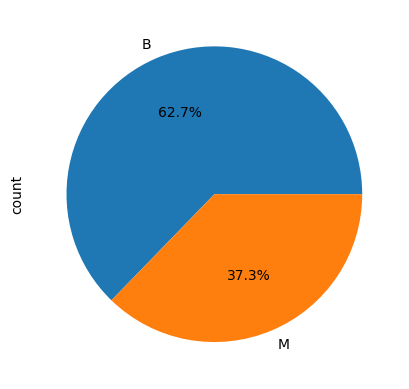

In [48]:
diagnosis_values.plot.pie(autopct='%1.1f%%')

In [49]:
bcwds.iloc[:, 1:11].describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_pts,mean_symmetry,mean_fractal_dim
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


<Axes: ylabel='Frequency'>

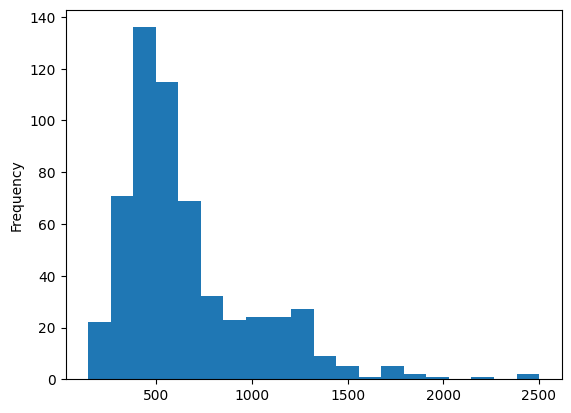

In [50]:
bcwds['mean_area'].plot.hist(bins=20)

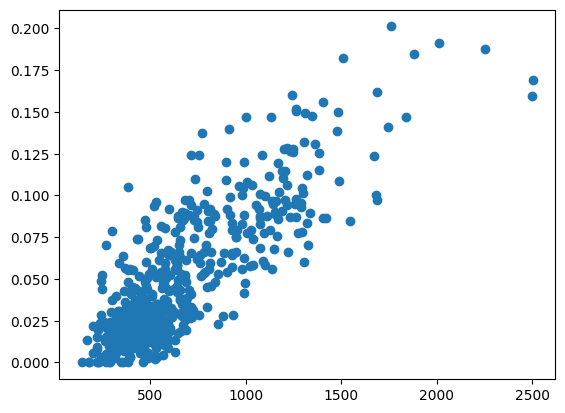

In [51]:
plt.scatter(x=bcwds['mean_area'], y=bcwds['mean_concave_pts'])

## Distribuzione valori suddivisi per classi

- In un problema di classificazione, è utile visualizzare quanto le variabili predittive siano correlate con la classe da predire
- Negli ultimi punti dell'esercizio abbiamo generato grafici con la distribuzione delle variabili, ignorando la classe di appartenenza
- Vogliamo ora integrare l'informazione della classe negli stessi grafici, per valutare quanto le variabili siano utili nella predizione della classe
    - Cioè voglio valutare ad esempio un istogramma con `mean_area` suddiviso per classe.
    

- Visualizziamo un'istogramma _stacked_ di `mean_area`, in cui in ogni intervallo si vede la suddivisione dei valori tra le due classi
  - con `pivot(columns="diagnosis")` sdoppiamo ciascuna colonna nel frame, suddividendo i valori relativi alle classi B e M
  - con `["mean_area"]` selezioniamo le due colonne `("mean_area", *)`
  - visualizziamole in un'istogramma, specificando `stacked=True` per far sì che le barre delle due colonne siano poste una sopra l'altra

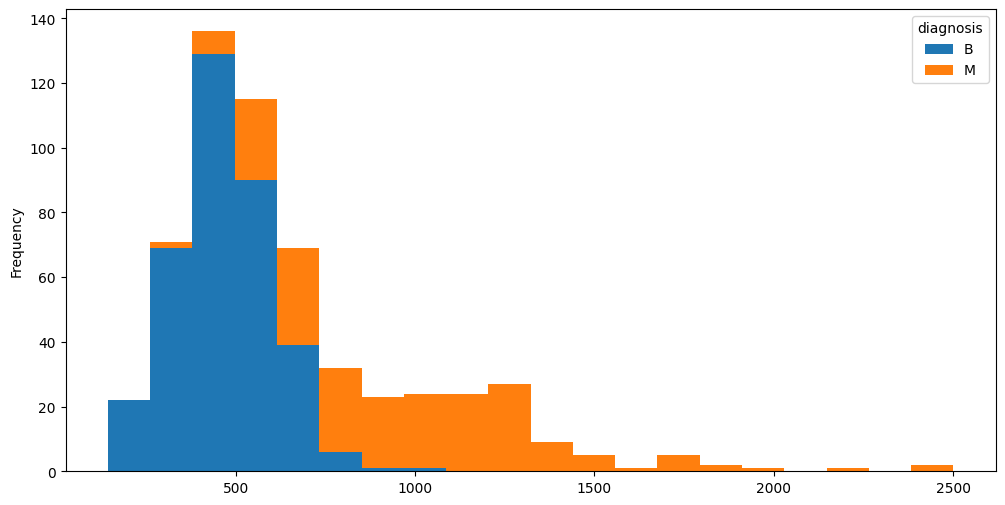

In [52]:
bcwds.pivot(columns="diagnosis")["mean_area"].plot.hist(bins=20, stacked=True, figsize=(12, 6));

- Questo grafico evidenzia ad es. che la `mean_area` è tendenzialmente bassa nei casi B e alta nei casi M

- Possiamo evidenziare le classi anche nei diagrammi a dispersione con la distribuzione tra due variabili, differenziando i punti ad es. per colore
- Definiamo in un dizionario che associ un colore a ciascuna classe

In [53]:
diagnosis_color_map = {"B": "blue", "M": "red"}

- Col metodo `map`, convertiamo ciascun elemento in una serie (o frame) secondo un dizionario dato

In [54]:
diagnosis_colors = bcwds["diagnosis"].map(diagnosis_color_map)

- Otteniamo così una serie di valori "red" e "blue"

In [55]:
diagnosis_colors.tail(4)

0
926682     red
926954     red
927241     red
92751     blue
Name: diagnosis, dtype: object

- Usiamo questa serie come parametro `c` nel metodo `plot.scatter` per assegnare un colore differenziato ai punti del grafico a dispersione

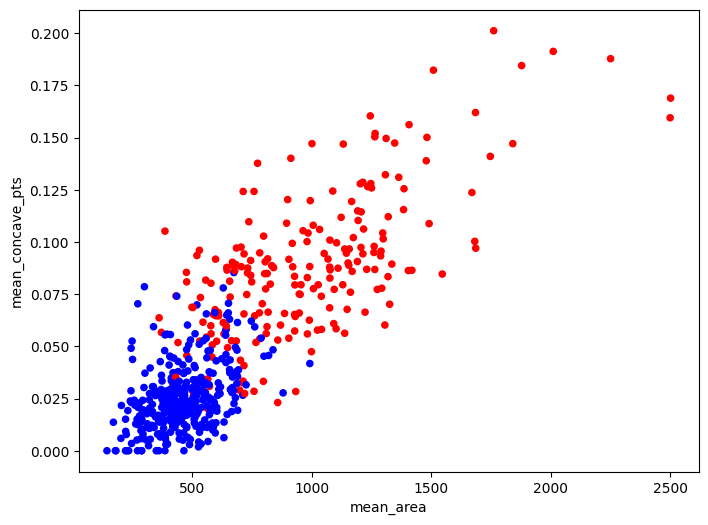

In [56]:
bcwds.plot.scatter("mean_area", "mean_concave_pts", c=diagnosis_colors, figsize=(8, 6));

## Classificazione Lineare

- Come sempre, la prima cosa che si può fare è provare a vedere se ci siano relazioni lineari fra le variabili.
- Come per la regressione, anche per la classificazione i metodi più semplici si basano su modelli con relazioni lineari tra le variabili
- Un classificatore a due classi _lineare_ è definito da un **iperpiano** che separa lo spazio delle variabili in due _semispazi_
  - la classe prevista per un'osservazione (un punto) dipende dal semispazio in cui si trova
- Se consideriamo uno spazio di due variabili (un piano), questo significa in pratica tracciare una retta che separi una classe dall'altra

- Consideriamo ad esempio il piano visualizzato sopra con le due variabili `mean_area` e `mean_concave_pts` e le osservazioni differenziate per classe
- Selezioniamo i dati su cui lavorare
  - la variabile `y` da predire è la classe: B (benigno) o M (maligno)
  - le variabili `X` sono `mean_area` ($x_1$) e `mean_concave_pts` ($x_2$), per ora ignoriamo le altre variabili

In [57]:
y = bcwds["diagnosis"]
X2d = bcwds[["mean_area", "mean_concave_pts"]]

- Suddividiamo come al solito i dati in un training set e in un validation set con la funzione `train_test_split`

In [58]:
from sklearn.model_selection import train_test_split

X2d_train, X2d_val, y_train, y_val = train_test_split(
    X2d, y,           # dati da suddividere
    test_size=1/3,    # proporzione: 2/3 training, 1/3 validation
    random_state=42   # seed per la riproducibilità
)

- Visualizziamo i dati di training su cui addestrare il classificatore
  - applichiamo ad `y_train` la mappa dei colori definita sopra

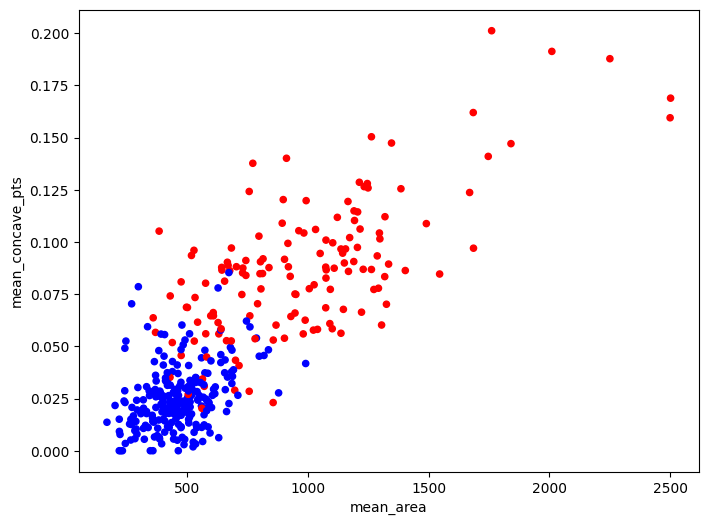

In [59]:
X2d_train.plot.scatter("mean_area", "mean_concave_pts", c=y_train.map(diagnosis_color_map), figsize=(8, 6));

- Per addestrare un classificatore lineare, dobbiamo individuare **una retta che separi i punti rossi dai punti blu**
- In seguito, ciascuna nuova osservazione sarà classificata "B" (blu) o "M" (rossa) a seconda del lato della retta su cui si trova
- Ipotizziamo ad esempio di utilizzare come separatore la retta descritta dall'equazione
$$ x_2 = -0.0001\cdot x_1+0.15 $$
- Possiamo rappresentare la retta sovrapposta ai dati similmente a come abbiamo fatto per i modelli di regressione
  - campioniamo una serie di valori campione per $x_1$ (essendo una retta bastano i due estremi)
  - estraiamo i valori corrispondenti di $x_2$

In [60]:
sep_x1 = np.linspace(0, 1500, 2)
sep_x2 = -0.0001 * sep_x1 + 0.15

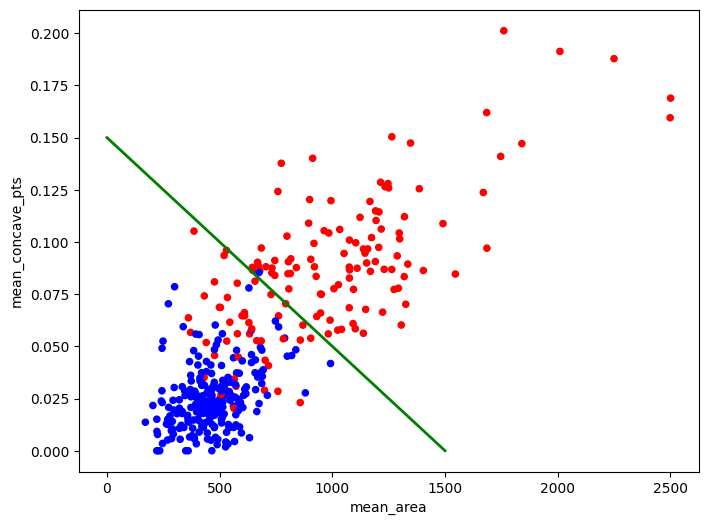

In [61]:
X2d_train.plot.scatter("mean_area", "mean_concave_pts", c=y_train.map(diagnosis_color_map), figsize=(8, 6))
plt.plot(sep_x1, sep_x2, c="green", linewidth=2);

### Estrazione predizioni classificazione

- Creare un array `y_pred` che indichi la classe predetta (`"M"` o `"B"`) per ciascuna osservazione del validation set `X2d_val`
- Consiglio: servirsi della funzione `np.where(B, xt, xf)`, che dato un array (o serie) booleano `B` ne restituisce uno di pari lunghezza con i valori `xt` e `xf` al posto di `True` e `False`

In [62]:
is_malignat = X2d_val['mean_area'] * -0.0001 + 0.15 < X2d_val['mean_concave_pts']
y_pred = np.where(is_malignat, "M", "B")

### Accuratezza delle predizioni

- Per confrontare diversi classificatori, vogliamo una misura quantitativa della loro bontà
- Nella predizione di valori continui (regressione), possiamo valutare un modello in base a quanto ciascun valore predetto si avvicini a quello reale
  - questo è misurato con metriche quali ad es. MSE o R²
- Nella classificazione, possiamo valutare direttamente se le classi predette coincidano o meno con quelle reali
- Definiamo come **accuratezza** la percentuale di osservazioni del validation set di cui il modello predice correttamente la classe

#### Calcolo dell'accuratezza

- Estrarre un array booleano `correct_class` che indichi per quali osservazioni del validation set la classe indicata in `y_pred` è corretta
- Da questo calcolare l'accuratezza, ovvero la percentuale di classificazioni corrette

In [63]:
correct_class = y_pred == y_val
accuracy = correct_class.mean()
accuracy

0.8789473684210526

### Modelli di classificazione lineari

- Abbiamo validato un modello di classificazione individuato "ad occhio", vediamo ora come addestrarne uno in modo automatico
- Un modello di classificazione lineare a $n$ variabili $x_1,\ldots,x_n$ consiste in generale nell'individuare un iperpiano di classificazione descritto dall'equazione:
$$ w_1\cdot x_1+\ldots+w_n\cdot x_n+b = 0 $$
- In forma vettoriale:
$$ \mathbf{w}\cdot\mathbf{x}+b = 0 $$
- L'addestramento del modello consiste nel determinare valori ottimali per il vettore $\mathbf{w}$ (_weights_, pesi) e per il termine $b$ (_bias_, distanza dell'iperpiano dall'origine)

#### Perceptron

- Il _perceptron_ è un algoritmo di apprendimento molto semplice, concettualmente simile alla discesa gradiente
  - i parametri $\mathbf{w}$ e $b$ sono inizializzati casualmente
  - si itera il training set: per ogni istanza mal classificata, i parametri vengono aggiornati proporzionalmente ai valori di $\mathbf{x}$ e ad un _learning rate_ preimpostato
  - si possono eseguire molteplici iterazioni del training set
- Per creare un modello perceptron, come per i modelli di regressione, iniziamo creando un'istanza della classe `Perceptron`
  - ci sono diversi parametri impostabili per ottenere varianti (es. con regolarizzazione), ma quì non le consideriamo

- Prima di procedere, dato che le variabili `mean_area` e `mean_concave_pts` hanno scale molto diverse, ne effettuiamo la standardizzazione (media 0 e dev. standard 1)
  - evitiamo per ora di utilizzare una pipeline, per analizzare più agevolmente il modello
- Utilizziamo un filtro `StandardScaler` per ottenere gli array `X2dn_train` e `X2dn_val` con i dati in `X2d_train` e `X2d_val` standardizzati

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2dn_train = scaler.fit_transform(X2d_train) # addestriamo lo scaler sui dati di training (cioè trova i parametri di scaling giusti)
X2dn_val = scaler.transform(X2d_val) #gli stessi parametri di scaling li applichiamo al dataset di validation

- Visualizziamo in un grafico a dispersione i dati standardizzati `X2dn_train` con classi differenziate
  - si ottiene una figura identica a quella dei dati non standardizzati, con solamente gli intervalli degli assi cambiati

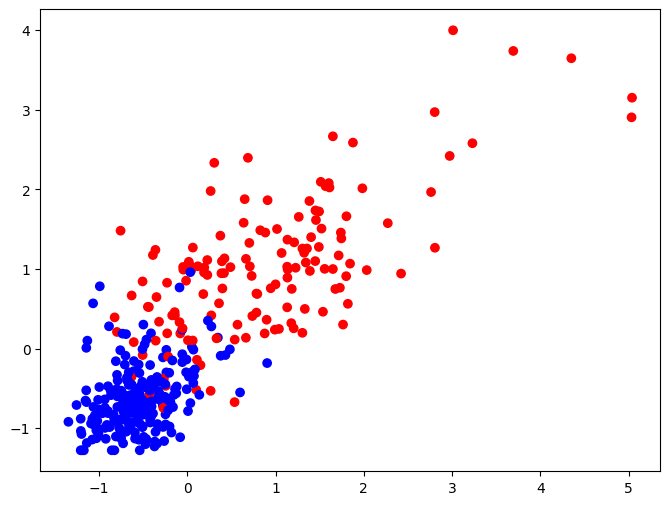

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(X2dn_train[:, 0], X2dn_train[:, 1], c=y_train.map(diagnosis_color_map));

- Creiamo un modello Perceptron


In [66]:
from sklearn.linear_model import Perceptron
model = Perceptron(random_state=42)

- Addestriamo il modello sul training set standardizzato
  - come nei modelli di regressione, passiamo separatamente i valori delle variabili predittive (X) e quelli della variabile da predire (y)

In [67]:
model.fit(X2dn_train, y_train)

Perceptron(random_state=42)

- Una volta addestrato il modello, possiamo trovare i valori dei pesi $\mathbf{w}$ e del bias $b$ rispettivamente negli attributi `coef_[0]` e `intercept_[0]`
  - lo `[0]` si riferisce al primo iperpiano, in questo caso è l'unico, in un modello a più di due classi sarebbero molteplici

In [68]:
model.coef_[0]

array([0.55782253, 1.686364  ])

In [69]:
model.intercept_[0]

-1.0

- Ad esempio questi coefficienti indicano che l'iperpiano individuato dal modello è descritto dall'equazione
$$ 0.558x_1+1.686x_2-1 = 0 $$
- L'attributo `classes_` mostra le classi riconosciute dal classificatore
  - la prima è quella a cui sono assegnati i punti sotto la retta, la seconda quella a cui sono assegnati i punti sopra

In [70]:
model.classes_

array(['B', 'M'], dtype='<U1')

- Per visualizzare la retta del modello...
$$ w_1\cdot x_1+w_2\cdot x_2+b = 0 $$
- ...la esprimiamo nella forma $x_2=\ldots$
$$ x_2 = -\frac{w_1}{w_2}\cdot x_1-\frac{b}{w_2} $$
- Implementiamo una funzione `separator_2d` in modo che, dato un modello e un array di valori $x_1$, restituisca l'array di corrispondenti valori $x_2$

In [71]:
def separator_2d(model, x1):
    # ricaviamo w e b dal modello
    w = model.coef_[0]
    b = model.intercept_[0]
    # riportiamo in NumPy la formula sopra
    return -x1 * w[0] / w[1] - b / w[1]

- Creiamo una funzione per visualizzare la retta del modello sovrapposta al grafico a dispersione dei dati, simile a quella che utilizzavamo nella regressione

In [72]:
def plot_separator_on_data(X, y, model=None):
    X = np.array(X)
    colors = pd.Series(y).map(diagnosis_color_map)
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        sep_x = np.linspace(*xlim, 2)
        sep_y = separator_2d(model, sep_x)
        plt.plot(sep_x, sep_y, c="green", linewidth=2)
        plt.xlim(xlim); plt.ylim(ylim)

- Visualizziamo la retta di separazione sovrapposta al validation set

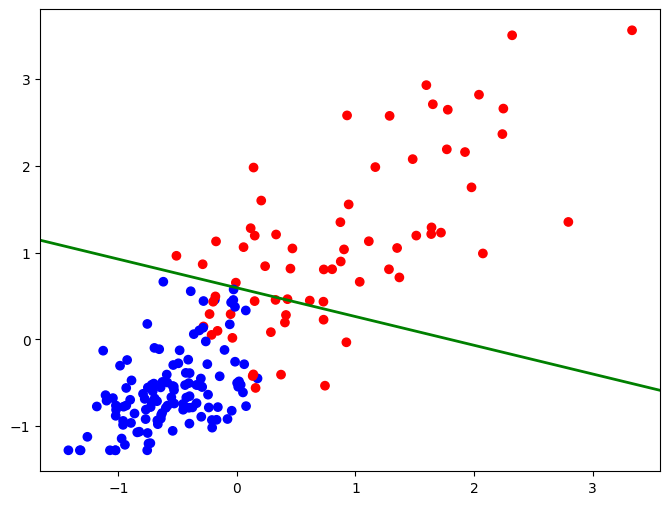

In [73]:
plot_separator_on_data(X2dn_val, y_val, model)